In [ ]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img, img_to_array

In [ ]:
folder = '/content/drive/MyDrive/Colab Notebooks/Data/Money/Train/'

photos, labels = list(), list()
for file in listdir(folder):

  if file.startswith('1K'):
    output = 1.0
  if file.startswith('2K'):
    output = 2.0
  if file.startswith('5K'):
    output = 3.0
  if file.startswith('10K'):
    output = 4.0
  if file.startswith('20K'):
    output = 5.0
  if file.startswith('50K'):
    output = 6.0
  if file.startswith('100K'):
    output = 7.0
  if file.startswith('200K'):
    output = 8.0
  if file.startswith('500K'):
    output = 9.0

  photo = load_img(folder + file, target_size =(100,100))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

photos_train = asarray(photos)
labels_train = asarray(labels)
print(photos_train.shape, labels_train.shape)

(540, 100, 100, 3) (540,)


In [ ]:
folder = '/content/drive/MyDrive/Colab Notebooks/Data/Money/Test/'
photos, labels = list(), list()
for file in listdir(folder):

  if file.startswith('1K'):
    output = 1.0
  if file.startswith('2K'):
    output = 2.0
  if file.startswith('5K'):
    output = 3.0
  if file.startswith('10K'):
    output = 4.0
  if file.startswith('20K'):
    output = 5.0
  if file.startswith('50K'):
    output = 6.0
  if file.startswith('100K'):
    output = 7.0
  if file.startswith('200K'):
    output = 8.0
  if file.startswith('500K'):
    output = 9.0

  photo = load_img(folder + file, target_size =(100,100))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

photos_test = asarray(photos)
labels_test = asarray(labels)
print(photos_test.shape, labels_test.shape)

(135, 100, 100, 3) (135,)


In [ ]:
photos_train = photos_train.reshape(540, 100, 100, 3)
photos_train = photos_train.astype('float32')/255 
photos_test = photos_test.reshape(135, 100, 100, 3)
photos_test = photos_test.astype('float32')/255



from keras.utils import  to_categorical
labels_train = to_categorical(labels_train)
labels_test = to_categorical(labels_test)
photos_train.shape, labels_train.shape, photos_test.shape, labels_test.shape

((540, 100, 100, 3), (540, 10), (135, 100, 100, 3), (135, 10))

In [ ]:
fine_labels = [
    '1K',
    '2K',
    '5K',
    '10K',
    '20K',
    '50K',
    '100K',
    '200K',
    '500K',
]

class_names = {}
counter = 0     

for instances in fine_labels:
  class_names.update({counter: instances})
  counter+=1 

In [ ]:
from keras.models import Sequential, Model
from keras import Input, Model
from keras.optimizers import Adam
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization, LeakyReLU

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'linear',
                 input_shape = (100,100,3), padding = 'same')) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(64, (3,3), activation = 'linear', padding ='same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(128, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Flatten())
model.add(Dense(128, activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(10, activation ='softmax'))

In [ ]:
model.compile(optimizer = Adam(), loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

train = model.fit(photos_train, labels_train, batch_size = 128 , epochs = 100, verbose = 1)

test_loss, test_acc = model.evaluate(photos_test, labels_test)
print('DO CHINH XAC', test_acc)
print('HAM MAT MAT', test_loss)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 100, 100, 32)      896       
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 100, 100, 32)      0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 50, 50, 64)        18496     
                                                                 
 leaky_re_lu_13 (LeakyReLU)  (None, 50, 50, 64)        0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 25, 25, 64)       0         
 g2D)                                                 

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/Data/Money/Money585.h5')

1/1 [==============================] - 0s 110ms/step
Predicted class: 500K


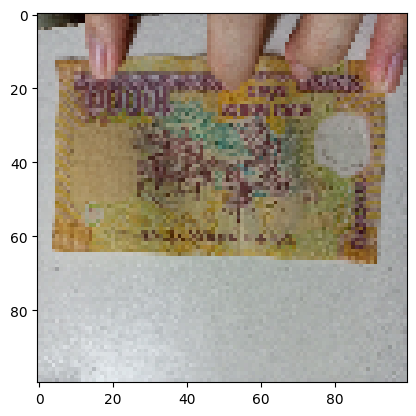

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
file_path = '/content/drive/MyDrive/Colab Notebooks/Data/Money/TEST1.jpg'

test_img  = load_img(file_path, color_mode='rgb', target_size=(100, 100))
img_arr   = img_to_array(test_img).reshape(1, 100, 100, 3)/255
class_pred = np.argmax(model.predict(img_arr))
print("Predicted class:", class_names[class_pred])

plt.imshow(test_img)


1/1 [==============================] - 0s 32ms/step
Predicted class: 2K


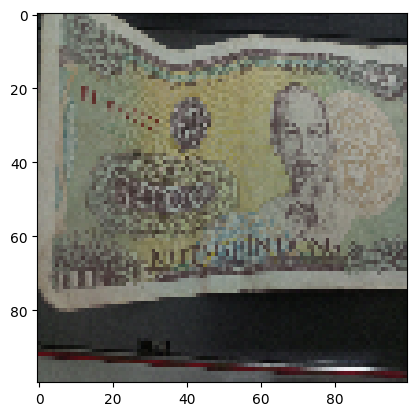

In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Data/Money/TEST2.jpg'

test_img  = load_img(file_path, color_mode='rgb', target_size=(100, 100))
img_arr   = img_to_array(test_img).reshape(1, 100, 100, 3)/255
class_pred = np.argmax(model.predict(img_arr))
print("Predicted class:", class_names[class_pred])

plt.imshow(test_img)

1/1 [==============================] - 0s 37ms/step
Predicted class: 500K


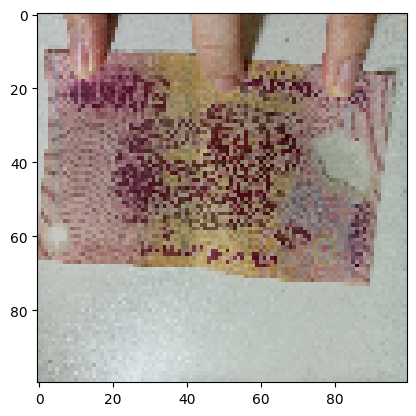

In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Data/Money/TEST3.jpg'

test_img  = load_img(file_path, color_mode='rgb', target_size=(100, 100))
img_arr   = img_to_array(test_img).reshape(1, 100, 100, 3)/255
class_pred = np.argmax(model.predict(img_arr))
print("Predicted class:", class_names[class_pred])

plt.imshow(test_img)